In [1]:
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [0]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()
train_images,test_images= train_images/255.0 , test_images/255.0


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

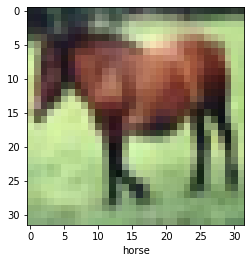

In [10]:
IMG_Index=7

plt.imshow(train_images[IMG_Index])
plt.xlabel(class_names[train_labels[IMG_Index][0]])
plt.show()

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=4, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 68s 1ms/sample - loss: 1.5332 - accuracy: 0.4405 - val_loss: 1.2291 - val_accuracy: 0.5652
Epoch 2/4
50000/50000 [==============================] - 67s 1ms/sample - loss: 1.1489 - accuracy: 0.5920 - val_loss: 1.0698 - val_accuracy: 0.6156
Epoch 3/4
50000/50000 [==============================] - 67s 1ms/sample - loss: 1.0049 - accuracy: 0.6478 - val_loss: 1.0401 - val_accuracy: 0.6367
Epoch 4/4
50000/50000 [==============================] - 67s 1ms/sample - loss: 0.9130 - accuracy: 0.6810 - val_loss: 0.9359 - val_accuracy: 0.6761


In [0]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# pick an image to transform
test_img = train_images[20]
img = image.img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:  # show 4 images
        break

plt.show()


array([[[[0.6       , 0.6156863 , 0.60784316],
         [0.68235296, 0.7058824 , 0.7372549 ],
         [0.60784316, 0.64705884, 0.6745098 ],
         ...,
         [0.47843137, 0.49019608, 0.48235294],
         [0.5411765 , 0.56078434, 0.5529412 ],
         [0.38039216, 0.39607844, 0.38039216]],

        [[0.627451  , 0.6392157 , 0.64705884],
         [0.6431373 , 0.6666667 , 0.7058824 ],
         [0.5882353 , 0.62352943, 0.6627451 ],
         ...,
         [0.5372549 , 0.5294118 , 0.5058824 ],
         [0.627451  , 0.6313726 , 0.6156863 ],
         [0.40392157, 0.42745098, 0.41960785]],

        [[0.54901963, 0.56078434, 0.5764706 ],
         [0.5764706 , 0.59607846, 0.6509804 ],
         [0.53333336, 0.5686275 , 0.61960787],
         ...,
         [0.40784314, 0.40392157, 0.3882353 ],
         [0.49019608, 0.5019608 , 0.49019608],
         [0.3647059 , 0.4       , 0.39607844]],

        ...,

        [[0.6862745 , 0.69411767, 0.7019608 ],
         [0.6666667 , 0.6745098 , 0.68235296]